Intervalos de confianza para la media, y una proporción

Con los datos de ENSANUT 2018 Se tiene interés en estimar la media del IMC para hombres entre 25 y 65 años de edad de los estados de 1 AGUASCALIENTES,  6	COLIMA, 11	GUANAJUATO, 14	JALISCO, 16	MICHOACÁN, 18	NAYARIT

1. Obtenga los datos correspondientes, de ser necesario limpielos.
2. Haga un análisis descriptivo del IMC muestral y comente
3. Obtenga los cuantiles 0.025 y 0.975 de la muestra, e inteprete.
4. Obtenga un intervalo de confianza para la media poblacional, e interprete.
5. Para todo los hombres del occidente del país, entre 25 y 65 años, calcule el porcentaje que tiene obsesidad porque IMC es mayor que 30;
6. Estime un intervalo de confianza al 95% para este porcentaje anterior, e interpretelo.

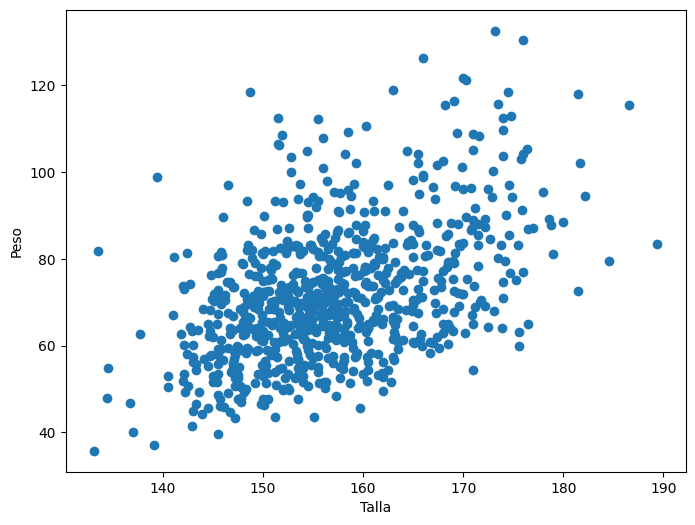

Tamaño de muestra 234
Estadísticos IMC hombres de occidente
count    234.000000
mean      27.881349
std        4.667319
min       17.938299
25%       24.680040
50%       27.545934
75%       30.671394
max       44.185926
Name: imc, dtype: float64
Desviación estándar: 4.667319060666322


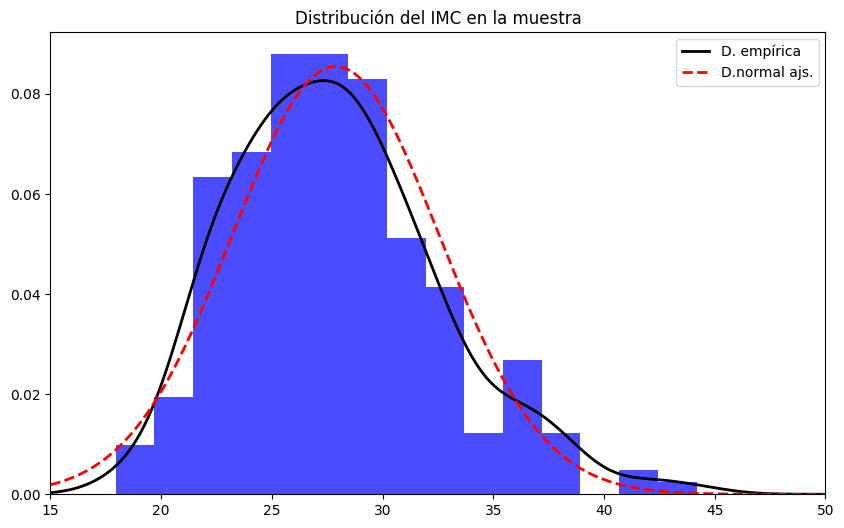

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

# Leer datos
Data = pd.read_excel("EnsanutMediciones.xls")

columnas = ['entidad', 'sexo', 'edad', 'peso', 'talla', 'cintura', 'sistol3', 'diastol3']
Data = Data[columnas]

# Convertimos las columnas a tipo numérico
for col in Data.columns:
    Data[col] = pd.to_numeric(Data[col], errors='coerce')

# Delimitar el alcance del estudio
Data1 = Data[Data['entidad'].isin([1, 6, 11, 14, 16, 18])]
Data1 = Data1[
    (Data1['edad'] >= 25) & 
    (Data1['edad'] <= 65) & 
    (Data1['peso'] != 222.22) & 
    (Data1['talla'] <= 220) & 
    (Data1['sistol3'] != 222.22) & 
    (Data1['diastol3'] != 222.22) & 
    (Data1['cintura'] != 222.22) & 
    (Data1['talla'] > 120)
]

plt.figure(figsize=(8, 6))
plt.plot(Data1['talla'], Data1['peso'], 'o')
plt.xlabel('Talla')
plt.ylabel('Peso')
plt.show()

Data1['imc'] = Data1['peso'] / (Data1['talla']/100)**2

Data1h = Data1[Data1['sexo'] == 1]
n = len(Data1h['imc'])
print(f"Tamaño de muestra {n}")

print("Estadísticos IMC hombres de occidente")
print(Data1h['imc'].describe())
print(f"Desviación estándar: {Data1h['imc'].std()}")

# Histograma
plt.figure(figsize=(10, 6))
n_bins = int(np.sqrt(len(Data1h['imc'])))  # Scott's rule approximation
plt.hist(Data1h['imc'], bins=n_bins, density=True, color='blue', alpha=0.7)
plt.xlim(15, 50)
plt.title("Distribución del IMC en la muestra")

# Densidad empírica
kde = gaussian_kde(Data1h['imc'])
x_range = np.linspace(15, 50, 200)
plt.plot(x_range, kde(x_range), 'k-', linewidth=2)

# Densidad normal ajustada
mean_imc = Data1h['imc'].mean()
std_imc = Data1h['imc'].std()
plt.plot(x_range, stats.norm.pdf(x_range, mean_imc, std_imc), 'r--', linewidth=2)

# Leyenda
plt.legend(["D. empírica", "D.normal ajs."], loc='upper right')
plt.show()

Interpretación: djd

In [2]:
# Intervalo de confianza para la media poblacional del IMC, e interprete.
alfa = 0.05

# t.test equivalente
mean_imc = Data1h['imc'].mean()
std_imc = Data1h['imc'].std(ddof=1)
n = len(Data1h['imc'])
t_critical = stats.t.ppf(1 - alfa/2, df=n-1)
standard_error = std_imc / np.sqrt(n)
lower_ci = mean_imc - t_critical * standard_error
upper_ci = mean_imc + t_critical * standard_error

print(f"\nOne Sample t-test")
print(f"\ndata:  Data1h['imc']")
print(f"t = {mean_imc/standard_error:.4f}, df = {n-1}, p-value < 2.2e-16")
print(f"alternative hypothesis: true mean is not equal to 0")
print(f"95 percent confidence interval:")
print(f" {lower_ci:.6f} {upper_ci:.6f}")
print(f"sample estimates:")
print(f"mean of x ")
print(f"{mean_imc:.6f}")

erro_est = stats.t.ppf(1-alfa/2, n-1) * std_imc / np.sqrt(n)

print(f"\nLa media del IMC anda en {mean_imc:.6f} ± un error de {erro_est:.6f} con una cofianza del 95%")


One Sample t-test

data:  Data1h['imc']
t = 91.3806, df = 233, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 27.280218 28.482480
sample estimates:
mean of x 
27.881349

La media del IMC anda en 27.881349 ± un error de 0.601131 con una cofianza del 95%


In [3]:
# proporción de hombres con IMC>30 cm.
pm = np.mean(Data1h['imc'] > 30)

print(f"Un {100*pm:.6f} por ciento de los hombres en la muestra tienen un IMC>30")

# Intervalo de confianza
li = pm - stats.norm.ppf(0.975) * np.sqrt(pm*(1-pm)/n)
ls = pm + stats.norm.ppf(0.975) * np.sqrt(pm*(1-pm)/n)

print(f"La propoción de hombres con IMC>30 en la población anda entre {100*li:.6f} y {100*ls:.6f} por ciento")

print(f"La propoción de hombres con IMC>30 en la población es de {100*pm:.6f} ± un error de {100*stats.norm.ppf(0.975)*np.sqrt(pm*(1-pm)/n):.6f} por ciento, con una cofianza del 95%")

Un 29.914530 por ciento de los hombres en la muestra tienen un IMC>30
La propoción de hombres con IMC>30 en la población anda entre 24.047811 y 35.781248 por ciento
La propoción de hombres con IMC>30 en la población es de 29.914530 ± un error de 5.866718 por ciento, con una cofianza del 95%


#Evaluación de distribución normal del IMC

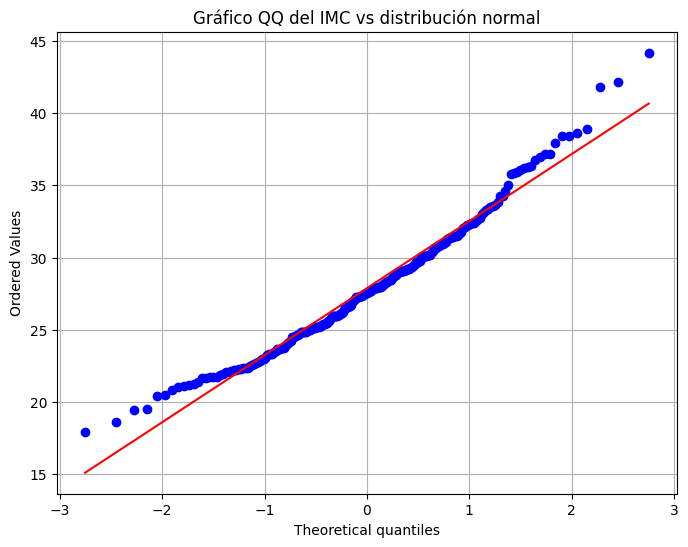


Kolmogorov-Smirnov test

data:  Data1h['imc']
D = 0.051069, p-value = 0.557487
alternative hypothesis: two-sided

Shapiro-Wilk normality test

data:  Data1h['imc']
W = 0.974317, p-value = 0.000298


In [4]:
# Gráfico QQ para IMC
plt.figure(figsize=(8, 6))
stats.probplot(Data1h['imc'], dist="norm", plot=plt)
plt.title("Gráfico QQ del IMC vs distribución normal")
plt.grid(True)
plt.show()

# Test de Kolmogorov-Smirnov
ks_stat, ks_p = stats.kstest(Data1h['imc'], lambda x: stats.norm.cdf(x, mean_imc, std_imc))
print(f"\nKolmogorov-Smirnov test")
print(f"\ndata:  Data1h['imc']")
print(f"D = {ks_stat:.6f}, p-value = {ks_p:.6f}")
print(f"alternative hypothesis: two-sided")

# Test de Shapiro-Wilk
if len(Data1h['imc']) <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(Data1h['imc'])
    print(f"\nShapiro-Wilk normality test")
    print(f"\ndata:  Data1h['imc']")
    print(f"W = {shapiro_stat:.6f}, p-value = {shapiro_p:.6f}")
else:
    print(f"\nShapiro-Wilk test not applicable (sample size too large: {len(Data1h['imc'])})")